<a href="https://colab.research.google.com/github/aabarzu/Coding-Dojo/blob/main/Regresi%C3%B3nLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Montar datos**

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Carga Librerias**

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# importar modelo de regresión lineal
from sklearn.linear_model import LinearRegression

sns.set_theme()

In [113]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

# **Carga de Datos**

In [114]:
def CargaDatos(filename):
  
  extension = filename[filename.find('.')+1:]
  path = "/content/drive/MyDrive/CodingDojo/DataScience/PandasForDataManipulation/Datos/"

  filename = path + filename
  if extension.lower() == 'csv':
      df = pd.read_csv(filename)   # csv
  
  if extension.lower() == 'xlsx':
      df = pd.read_excel(filename) # Excel

  return df

In [115]:
#Carga de Archivos

filename = 'modifiedBostonHousing.csv' 

df = CargaDatos(filename)

df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [116]:
df.shape

(506, 14)

In [117]:
# obteniendo las columnas solicitadas en la tarea
df = df.loc[:, ['RM', 'LSTAT','PTRATIO', 'price']]
df.head()

,RM,LSTAT,PTRATIO,price
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


In [118]:
# Faltan valores en la columna y, que es lo que predeciremos.
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
price      1
dtype: int64

In [119]:
# Elimine filas enteras del marco de datos si contienen nans o 'todos'
# this may not be the best strategy for our dataset
df = df.dropna(how = 'any')

In [120]:
# No hay más valores perdidos
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
price      0
dtype: int64

In [121]:
df.shape

(505, 4)

In [122]:
df.corr()

,RM,LSTAT,PTRATIO,price
RM,1.000000,-0.614889,-0.356013,0.143347
LSTAT,-0.614889,1.000000,0.372996,-0.027292
PTRATIO,-0.356013,0.372996,1.000000,-0.187262
price,0.143347,-0.027292,-0.187262,1.000000


In [123]:
df.corr().sort_values(by = ['price'])

,RM,LSTAT,PTRATIO,price
PTRATIO,-0.356013,0.372996,1.000000,-0.187262
LSTAT,-0.614889,1.000000,0.372996,-0.027292
RM,1.000000,-0.614889,-0.356013,0.143347
price,0.143347,-0.027292,-0.187262,1.000000


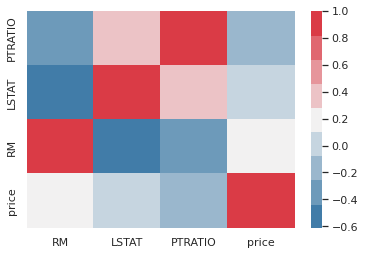

In [124]:

sns.heatmap(df.corr().sort_values(by = ['price']), cmap = sns.diverging_palette(240, 10, n=9))

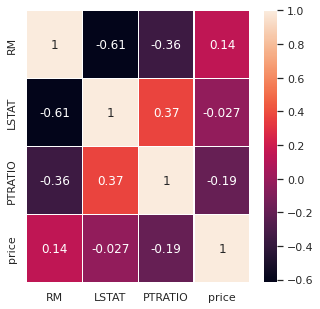

In [125]:
f, ax = plt.subplots(figsize=(5, 5))

correlation_mat = df.corr()
 
sns.heatmap(correlation_mat, annot = True , linewidths=.5, ax=ax );

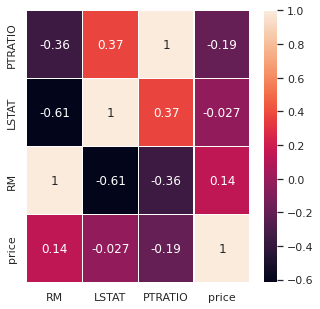

In [126]:
f, ax = plt.subplots(figsize=(5, 5))

correlation_mat = df.corr().sort_values(by=['price'])
 
sns.heatmap(correlation_mat, annot = True , linewidths=.5, ax=ax );

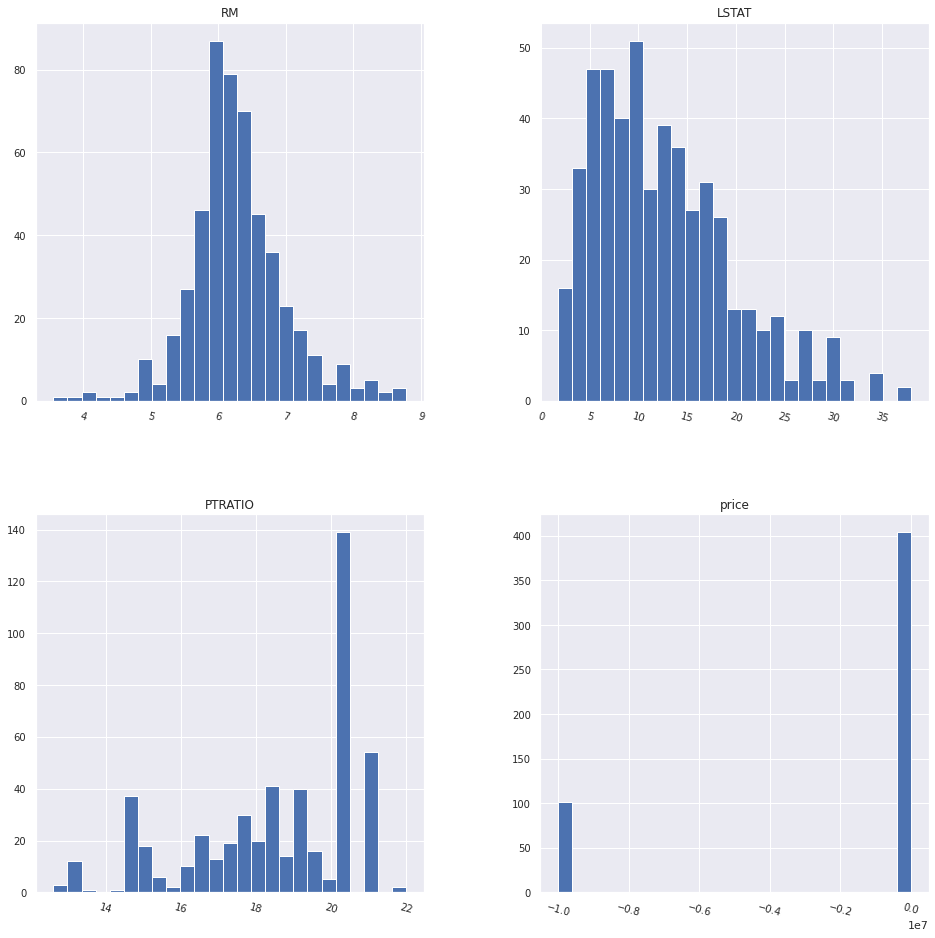

In [127]:
df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

In [128]:
priceFilter = df.loc[:, 'price'] < 0 
df = df.loc[~priceFilter, :]

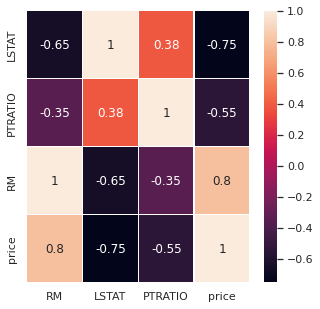

In [129]:
f, ax = plt.subplots(figsize=(5, 5))

correlation_mat = df.corr().sort_values(by=['price'])
 
sns.heatmap(correlation_mat, annot = True , linewidths=.5, ax=ax );

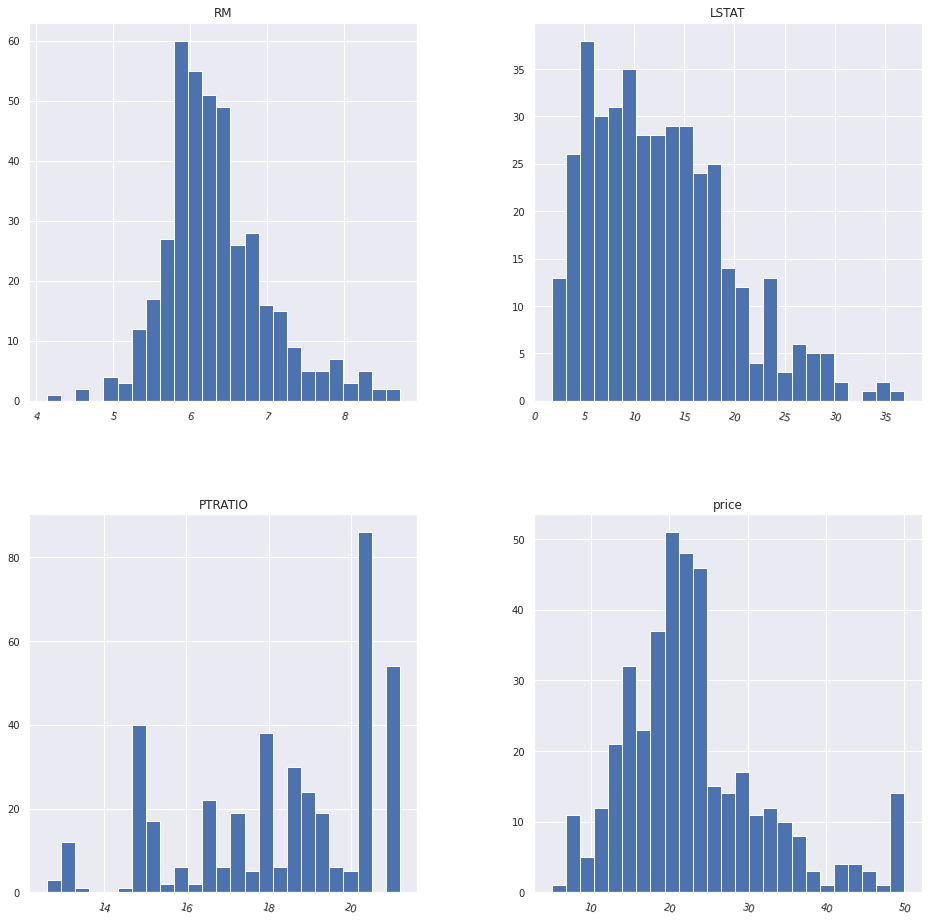

In [130]:
df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

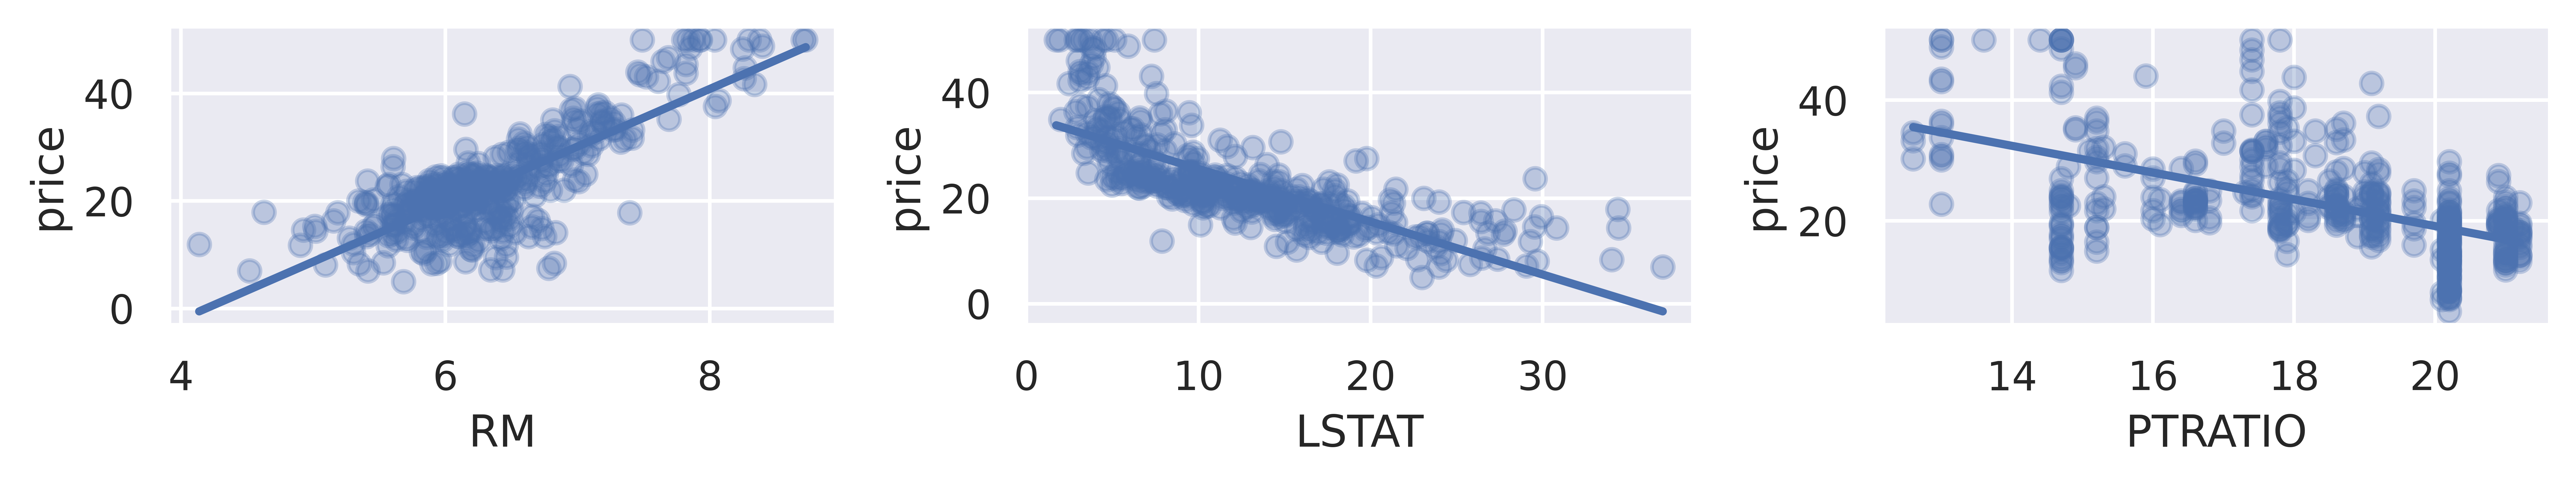

In [131]:
"""
You can use seaborn to see if you have linear relationships between each feature variable and the target
"""
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=1000)
sns.regplot(x='RM', y='price', data=df, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='LSTAT', y='price', data=df, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x='PTRATIO', y='price', data=df, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});
fig.tight_layout()

In [132]:
# matriz de características (debe ser una matriz NumPy)
# valores convierte el marco de datos en Num
X = df.loc[:, ['RM', 'LSTAT', 'PTRATIO']].values

In [133]:
# Features Matrix needs to be at 2 dimensional
X.shape

(404, 3)

In [134]:
# vector de destino
y = df.loc[:, 'price'].values

In [135]:
y.shape

(404,)

In [136]:
# Hacer una instancia de regresión lineal
reg = LinearRegression(fit_intercept=True)
reg

LinearRegression()

In [137]:
reg.fit(X,y)

LinearRegression()

In [138]:
X[0:10 ].reshape(-1,3)

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       [ 6.998,  2.94 , 18.7  ],
       [ 7.147,  5.33 , 18.7  ],
       [ 6.43 ,  5.21 , 18.7  ],
       [ 6.012, 12.43 , 15.2  ],
       [ 6.172, 19.15 , 15.2  ],
       [ 5.631, 29.93 , 15.2  ],
       [ 6.004, 17.1  , 15.2  ]])

In [139]:
X[0:10 ]

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       [ 6.998,  2.94 , 18.7  ],
       [ 7.147,  5.33 , 18.7  ],
       [ 6.43 ,  5.21 , 18.7  ],
       [ 6.012, 12.43 , 15.2  ],
       [ 6.172, 19.15 , 15.2  ],
       [ 5.631, 29.93 , 15.2  ],
       [ 6.004, 17.1  , 15.2  ]])

In [140]:
X

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [141]:
# La entrada debe ser bidimensional (la remodelación hace que la entrada sea bidimensional)
y_pred = reg.predict(X[0].reshape(-1,3))

y_pred , X[0]

(array([30.93692265]), array([ 6.575,  4.98 , 15.3  ]))

In [142]:
#Predecir para observaciones múltiples a la vez
y_pred = reg.predict(X[0:10])
y_pred , X[0:10]

(array([30.93692265, 25.54732909, 32.87840913, 31.22126902, 31.14158522,
        26.45245446, 23.99307176, 22.0562208 , 13.67300117, 21.85868698]),
 array([[ 6.575,  4.98 , 15.3  ],
        [ 6.421,  9.14 , 17.8  ],
        [ 7.185,  4.03 , 17.8  ],
        [ 6.998,  2.94 , 18.7  ],
        [ 7.147,  5.33 , 18.7  ],
        [ 6.43 ,  5.21 , 18.7  ],
        [ 6.012, 12.43 , 15.2  ],
        [ 6.172, 19.15 , 15.2  ],
        [ 5.631, 29.93 , 15.2  ],
        [ 6.004, 17.1  , 15.2  ]]))

In [143]:
score = reg.score(X, y)
print(score)

0.7848414273030438


In [144]:
#Tras insertar una instancia de un modelo en scikit-learn, puedes utilizar atributos adicionales.
reg.coef_

array([ 6.61452725, -0.44571061, -1.00672009])

In [145]:
reg.intercept_

5.0688621830514755

In [146]:
m1 = reg.coef_[0]
m2 = reg.coef_[1]
m3 = reg.coef_[2]
b = reg.intercept_
# siguiendo la forma de intersección de pendiente
print("formula: y = {:.2f}*RM + {:.2f}*LSTAT + {:.2f}*'PTRATIO + {:.2f}".format(m1,m2,m3,b) )

formula: y = 6.61*RM + -0.45*LSTAT + -1.01*'PTRATIO + 5.07


In [147]:

X_train = X[0:50]
y_train = y[0:50]

reg.fit(X_train,y_train)

X_test = X[0:10]
y_test = y[0:10]

y_pred = reg.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2   = r2_score(y_test, y_pred)

print(f"reg.score(X, y) {reg.score(X, y)}")
print(f"reg.coef_ {reg.coef_}")
print(f"reg.intercept_ {reg.intercept_}")
print(f"mae  {mae} ")
print(f"mse  {mse} ")
print(f"rmse {rmse} ")
print(f"r2   {r2}   ")


reg.score(X, y) 0.7716341391006101
reg.coef_ [ 5.64868728 -0.45681328 -0.72628056]
reg.intercept_ 5.9489800290295545
mae  3.5219534818705527 
mse  15.545674160494244 
rmse 3.942800294269828 
r2   0.6254234937956186   
